In [1]:
# SHAP可以解释任何机器学习模型的输出，支持XGBoost, LightGBM, CatBoost, scikit-learn和pyspark树模型的快速c++实现
# XGBoost二分类问题的SHAP解释
import xgboost as xgb
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import shap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 导入数据集
boston = load_boston()
DataSets ,LabelSets, feature_names = boston.data, boston.target, boston.feature_names

In [3]:
# 打印数据集
print('DataSets:',DataSets.shape,type(DataSets))
print('LabelSets:',LabelSets.shape,type(LabelSets))
print('feature_names:', len(feature_names), feature_names)

DataSets: (506, 13) <class 'numpy.ndarray'>
LabelSets: (506,) <class 'numpy.ndarray'>
feature_names: 13 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# 划分训练接和测试集
x_train,x_test,y_train,y_test = train_test_split(DataSets,LabelSets,test_size=0.2,random_state=0)

In [5]:
# 打印训练集和测试集
print('x_train:',x_train.shape,type(x_train))
print('x_test:',x_test.shape,type(x_test))
print('y_train:',y_train.shape,type(y_train))
print('y_test:',y_test.shape,type(y_test))

x_train: (404, 13) <class 'numpy.ndarray'>
x_test: (102, 13) <class 'numpy.ndarray'>
y_train: (404,) <class 'numpy.ndarray'>
y_test: (102,) <class 'numpy.ndarray'>


In [6]:
# 封装训练集和测试集
pd_x_train = pd.DataFrame(x_train, columns=feature_names)
pd_x_test = pd.DataFrame(x_test, columns=feature_names)

In [7]:
# 打印训练集和测试集数据的前几条数据
print('x_train:\n', pd_x_train.head())
print('x_test:\n', pd_x_test.head())

x_train:
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0   0.35809   0.0   6.20   1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
1   0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
2   0.11329  30.0   4.93   0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
3   0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
4  25.94060   0.0  18.10   0.0  0.679  5.304  89.1  1.6475  24.0  666.0   

   PTRATIO       B  LSTAT  
0     17.4  391.70   9.71  
1     19.2  376.94   9.88  
2     16.6  391.25  11.38  
3     15.2  395.60  12.43  
4     20.2  127.36  26.64  
x_test:
        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0   0.06724  0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
1   9.23230  0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
2   0.11425  0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
3  24.80170  0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24

In [8]:
# 创建模型并训练数据
model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,objective='reg:gamma')
model.fit(pd_x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=12,
             num_parallel_tree=1, objective='reg:gamma', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [9]:
# 对测试集进行预测
pred_y_test = model.predict(pd_x_test)

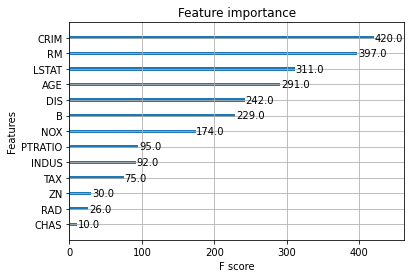

In [10]:
# 显示重要特征
plot_importance(model)
plt.show()

In [11]:
# 用SHAP解释模型
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(pd_x_train)

In [12]:
# 打印所有样本的相关SHAP相关解释量
print('Shap values:\n',shap_values)
print('SHAP值维度：',shap_values.values.shape)
print('Base Value维度：',shap_values.base_values.shape)
print('输入数据特征维度：',shap_values.data.shape)
print('Base Value:',explainer.expected_value)

Shap values:
 .values =
array([[ 2.17062254e-02,  7.63042655e-04, -9.47131589e-03, ...,
         5.61477318e-02, -2.28449842e-03,  5.46497218e-02],
       [ 1.69816352e-02,  4.68185608e-04,  4.38855123e-03, ...,
        -6.71326322e-03,  1.08135594e-02, -6.50714850e-03],
       [ 1.36081558e-02, -4.51841531e-03, -1.10358289e-02, ...,
         4.33380418e-02, -6.79227116e-04, -6.09660409e-02],
       ...,
       [ 1.20344209e-02,  4.36419738e-04, -1.20424675e-02, ...,
         4.15660162e-03,  4.21964796e-03, -5.19474037e-02],
       [ 2.15978995e-02,  1.61405711e-04, -1.32400952e-02, ...,
         2.31145881e-02,  4.97318665e-03, -1.75168470e-01],
       [ 2.17995532e-02,  1.44515361e-03,  8.19279905e-03, ...,
         6.52486980e-02,  5.21268696e-03, -7.46076852e-02]], dtype=float32)

.base_values =
array([3.1202767, 3.1202767, 3.1202767, 3.1202767, 3.1202767, 3.1202767,
       3.1202767, 3.1202767, 3.1202767, 3.1202767, 3.1202767, 3.1202767,
       3.1202767, 3.1202767, 3.1202767, 3.

In [13]:
# 打印第idx样本的相关SHAP相关解释量
idx = 10
print('Shap values:\n',shap_values[idx])
print('SHAP值维度：',shap_values[idx].values.shape)
print('Base Value维度：',shap_values[idx].base_values.shape)
print('输入数据特征维度：',shap_values[idx].data.shape)
print('Base Value:',explainer.expected_value)

Shap values:
 .values =
array([ 3.7491087e-02,  8.2069298e-04, -2.5642156e-03,  9.0594396e-05,
        4.6015125e-02,  6.7909169e-03,  1.6537903e-02,  2.8505668e-02,
        2.1301261e-03, -9.1501987e-03,  1.2292057e-01,  2.0249752e-02,
       -1.5039827e-01], dtype=float32)

.base_values =
3.1202767

.data =
array([1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
       6.1720e+00, 9.6100e+01, 5.9505e+00, 5.0000e+00, 3.1100e+02,
       1.5200e+01, 3.9690e+02, 1.9150e+01])
SHAP值维度： (13,)
Base Value维度： ()
输入数据特征维度： (13,)
Base Value: 3.1202767


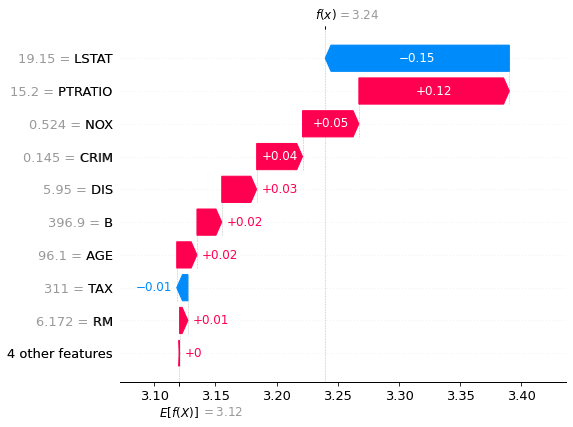

In [14]:
# 解释第idx样本：解释第idx个样本的shap值组成及变化
#每个特性都有助于将模型输出从基值(我们传递的训练数据集上的平均模型输出)推到模型输出。将预测推高的特征用红色表示，将预测推低的特征用蓝色表示。
# 纵轴为原始数据特性值，横轴为shap value，条形为每个特性shap value贡献的起始和终止长度及方向
shap.plots.waterfall(shap_values[idx])

In [15]:
# 解释第idx样本：解释第idx个样本的shap值组成及变化
shap.plots.force(shap_values[idx])

In [16]:
# 解释所有样本：解释所有样本的shap值组成及变化
# 如果我们使用许多力图解释，如上图所示，将它们旋转90度，然后水平堆叠，我们可以看到整个数据集的解释(在笔记本中，这个图是交互的):
# 注：横轴坐标和纵轴坐标可以选择，点击对应位置的下拉菜单即可
shap.plots.force(shap_values)

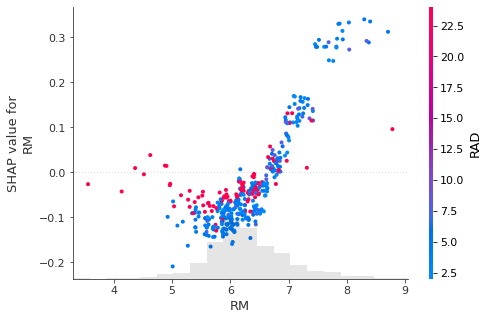

In [17]:
# 解释所有样本（单特征对输出shap值影响）：为了理解所有样本的单个特性如何影响模型的输出，我们可以绘制该特性的SHAP值与数据集中所有示例的特性值的对比图。SHAP值表示了特性对模型输出更改的贡献
# 横坐标轴特定取值处的垂直离散表示该特征与其他特征的交互效应。为了帮助揭示这些相互作用，我们可以用另一个特征来着色。
# 横坐标表示对应特征，左纵坐标表示对应的shap值，右颜色图表示与该特征相互作用比较明显的特征取值范围
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

(404, 13, 13)


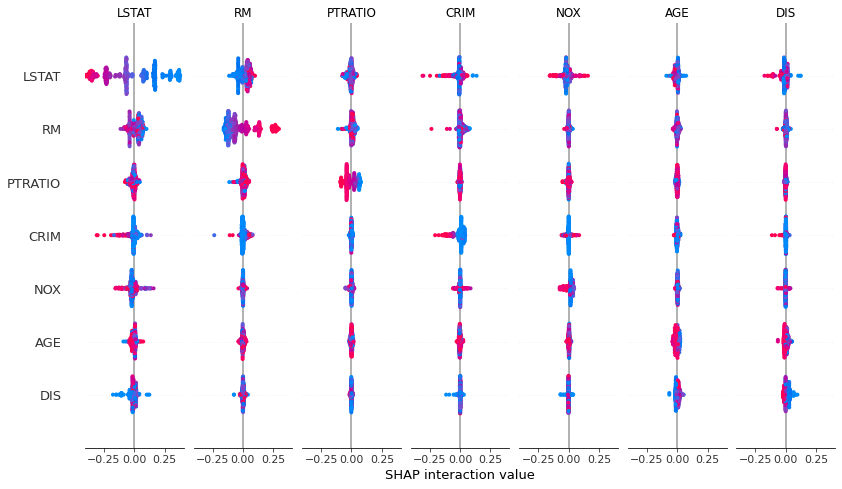

In [18]:
# 解释所有样本（特征与特征间的交互shap影响）：XGBoost为每个预测返回一个矩阵，其中主要影响在对角线上，而交互影响是非对角线上。主要效应类似于线性模型的SHAP值，交互效应捕获了所有高阶相互作用，并将它们划分到成对的相互作用项中。
# 请注意，整个交互矩阵的总和是模型当前输出和预期输出之间的差，因此非对角线上的交互影响被分成两半(因为每一种都有两种)。当绘制交互效果时，SHAP包会自动将非对角线值乘以2以获得完整的交互效果。
shap_interaction_values = explainer.shap_interaction_values(pd_x_train)
print(shap_interaction_values.shape)
shap.summary_plot(shap_interaction_values, pd_x_train)

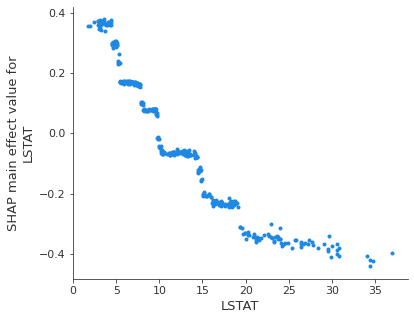

In [19]:
# 解释所有样本（主效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
shap.dependence_plot(("LSTAT", "LSTAT"), shap_interaction_values, pd_x_train)

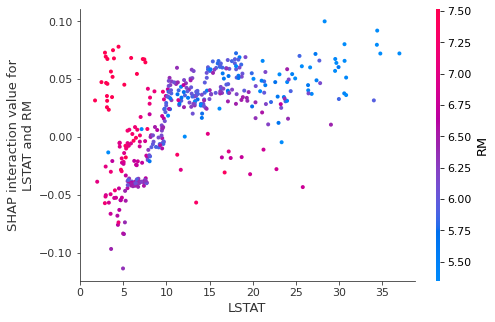

In [20]:
# 解释所有样本（交互效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
# 这些效应捕获了所有在原始SHAP图中存在但在上面的主要效应图中缺失的垂直扩散。
shap.dependence_plot(("LSTAT", "RM"), shap_interaction_values, pd_x_train)

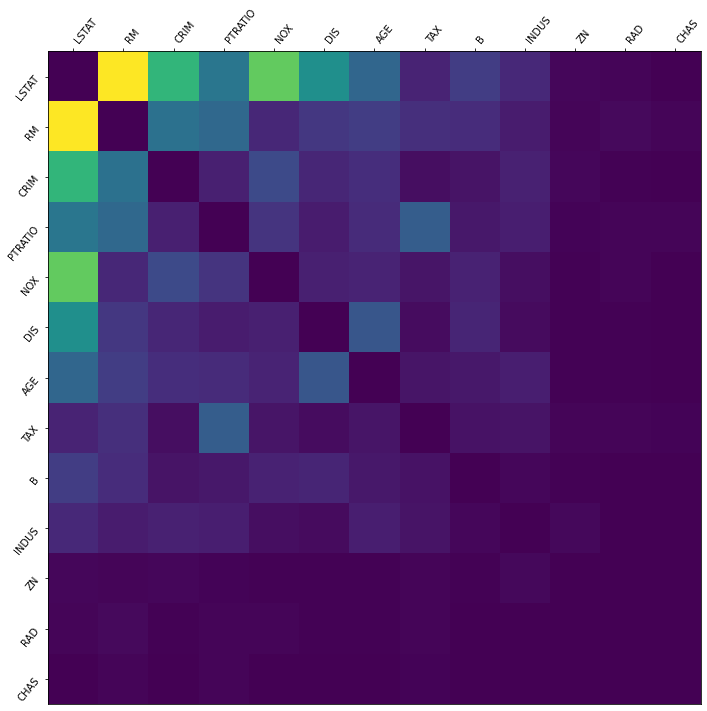

In [21]:
# 解释所有样本（交互效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), pd_x_train.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), pd_x_train.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

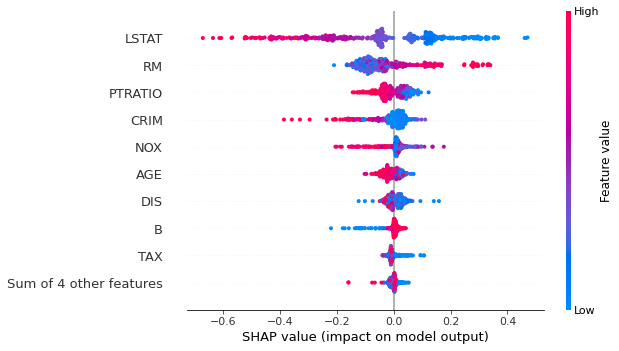

In [22]:
# 解释所有样本：为了获得对模型最重要的特性的概述，我们可以绘制所有样本的每个特性的SHAP值。
# 下图根据所有样本的SHAP值大小的总和对特征进行排序，并使用SHAP值显示每个特征对模型输出的影响分布。
# 颜色代表特征值(红色高，蓝色低)。
# 横坐标表示某一特征的shap值的取值范围（即对output的影响范围），纵坐标表示对应特征
shap.plots.beeswarm(shap_values)

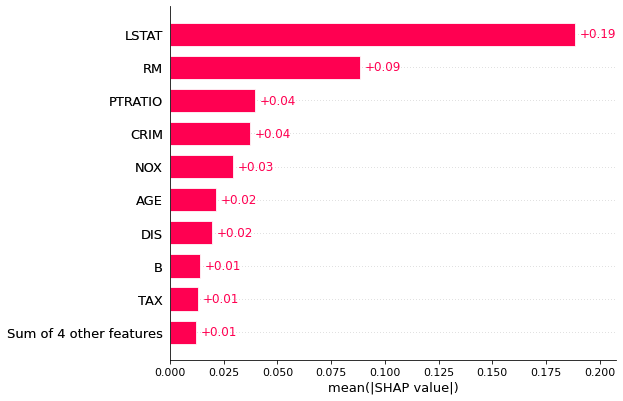

In [23]:
# 解释所有样本：我们也可以取每个特性的SHAP值的绝对值的平均值来得到一个标准的条形图(为多类输出生成堆叠的条形图):
# 横坐标所有样本在某一特征上shap值绝对值的平均值，纵坐标为对应特征
shap.plots.bar(shap_values)